## Figures for SOR 2025 poster session

Motion correlation in bidisperse dense suspensions

In [1]:
import os
import glob
import matplotlib               # type: ignore
import numpy             as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.colors as mcolors
import platform
from   pathlib           import Path
import importlib
import src.readFiles as readFiles

import seaborn as sns
import pandas as pd
from tqdm import tqdm
import networkx as nx
importlib.reload(readFiles)

plt.rcParams.update({
    'figure.max_open_warning': 0,
    'text.usetex':             True,
    'text.latex.preamble':     r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
    'figure.autolayout':       True,
    'font.family':             "STIXGeneral",
    'mathtext.fontset':        "stix",
    'font.size':               8,
    'axes.titlesize':          8,
    'axes.labelsize':          11,           # x and y label font size
    'axes.labelweight':        'bold',       # make axis labels bold
    'figure.titlesize':        8,
    'legend.frameon':          False,
    'legend.framealpha':       0.6,
    'legend.fancybox':         True,
    'axes.grid':               False,
    'axes.grid.axis':          'both',
    'grid.alpha':              0.2,
    'grid.linewidth':          0.4,
    'xtick.labelsize':         10,
    'ytick.labelsize':         10,
    'lines.linewidth':         1,
    'lines.markersize':        3,
    'savefig.transparent':     True,
    'savefig.pad_inches':      0,
    'savefig.format':          'pdf',
    'savefig.bbox':            'tight'
})

plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']


if platform.system() == 'Darwin':  # macOS
    topDir = Path("/Volumes/rahul_2TB/rigid/mu_inf/")
    fig_save_path = Path("/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/SOR_2025/figures/")
elif platform.system() == 'Linux':
    topDir = Path("/media/rahul/rahul_2TB/rigid/mu_inf/")
    fig_save_path = Path("/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/SOR_2025/figures/")
else:
    raise OSError("Unsupported OS")

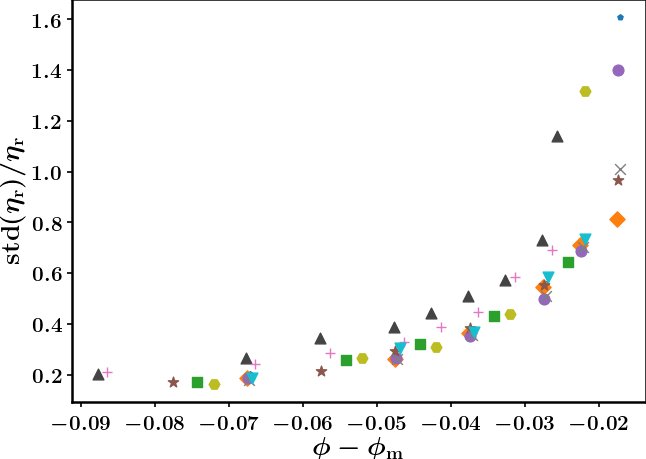

In [166]:
# Maron-Pierce All Plots

from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)
from sklearn.metrics import r2_score

def linearfit(x, c, m):
    return m * x + c

marker_size = [4, 4, 4, 4, 6]
line_width = 1.1
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off   = 100

gamma = 20
alpha = 2.4207 #2.4273

# Getting Phim vals
phim_all = []
c0s      = []
mvals    = []
for i, vri in enumerate(vrr):
    c0     = []
    m_list = []
    for j, arj in enumerate(arr):
        vrj  = '0.25' if arj == 1 else vri
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                #print(vrj)
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv)   if not np.isnan(x)]

        popt, pcov   = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
        c_opt, m_opt = popt
        c0.append(c_opt)
        m_list.append(m_opt)

    c0s.append(c0)
    mvals.append(m_list)
    x_intercept = -np.array(c0s) / np.array(mvals)
    phims       = list(x_intercept[0])
    phim_all.append(phims)
    c0s   = []
    mvals = []

################################
# final plot
# Monodisperse cases

fig, ax = plt.subplots(figsize=(6.7, 4.84))  # create one plot
pcount = 0

viscVar = []
for k, phi in enumerate(phiv):
    phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_var_list = []
    for run in range(numRuns):
        workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir + "data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            jammed   = any(x < 0 for x in data[:, 2])
            if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                visc_var = np.std(data[off:, 3]) / np.mean(data[off:, 3])
                visc_var_list.append(visc_var)
    viscVar.append(np.mean(visc_var_list) if visc_var_list else np.nan)

visc_var_filtered = [x for x in viscVar if not np.isnan(x)]
phi_vals_filtered = [(y-phim_all[0][0]) for x, y in zip(viscVar, phiv) if not np.isnan(x)]

ax.scatter(phi_vals_filtered, visc_var_filtered,
   marker=marker_shape[pcount], color=colors[pcount],
   s=marker_size[j]**2,  # scatter uses size in points^2
   label=fr'$\delta = {arj:.1f}$')
pcount += 1

#######################
# Bidisperse cases

arr  = [1.4, 2.0, 4.0]
for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        viscVar = []
        for k, phi in enumerate(phiv):
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_var_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                        visc_var = np.std(data[off:, 3]) / np.mean(data[off:, 3])
                        visc_var_list.append(visc_var)
            viscVar.append(np.mean(visc_var_list) if visc_var_list else np.nan)

        visc_var_filtered = [x for x in viscVar if not np.isnan(x)]
        phi_vals_filtered = [(y-phim_all[i][j+1]) for x, y in zip(viscVar, phiv) if not np.isnan(x)]

        ax.scatter(phi_vals_filtered, visc_var_filtered,
           marker=marker_shape[pcount], color=colors[pcount],
           s=60,  # scatter uses size in points^2
           label=fr'$\delta = {arj:.1f}$')
        
        pcount += 1

ax.set_xlabel(r'$\mathbf{\phi - \phi_m}$', fontsize=19, fontweight='bold')
ax.set_ylabel(r'$\mathbf{\mathrm{std}(\eta_r)/ \eta_{r}}$', fontsize=19, fontweight='bold')
ax.tick_params(axis='both', width=1.2, labelsize=15)  # adjust size , labelsize=10

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
    
for spine in ax.spines.values():
        spine.set_linewidth(1.8)
        
plt.tight_layout()
if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/std_visc{figFormat}', bbox_inches="tight",pad_inches=0, dpi=800, transparent=True)
plt.show()

In [52]:
phim[0][1]

0.7875859756938117

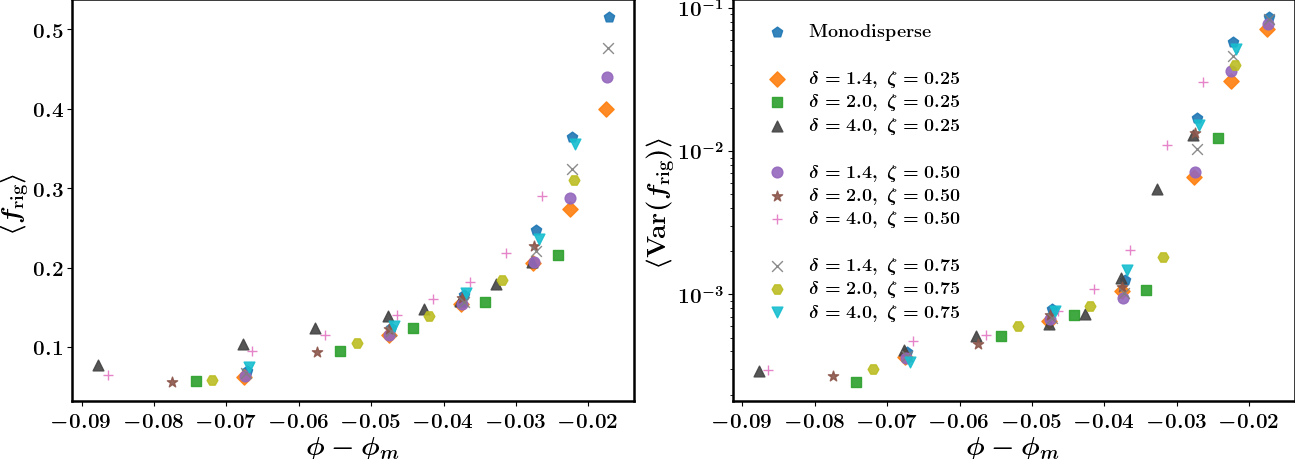

In [157]:
## Fig 4

phim = np.array([[0.7872064804028059, 0.7875859756938117, 0.7942468438323107, 0.8277176858608641],
                 [0.7872064804028059, 0.7874702672663239, 0.7975040557579345, 0.8264070772497983],
                 [0.7872064804028059, 0.7872409378097479, 0.7919770576875194, 0.8068872833222388]])

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 2 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [ r'$f_{rig}$', r'$\langle Z_{{net}} \rangle$']

phimall      = []
param        = []
paramserr    = []
zm           = []
#fig_height   = 2.3
#fig, ax= plt.subplots(1, 3, figsize=(11,3.5))
fig, ax= plt.subplots(1, 2, figsize=(13.19, 4.84))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = []
    paramserr_list = []
    zlist =[]
    for run in range(numRuns):
        phim_vals = [(i -  phim[0][0]) for i in phiv]
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        
        if os.path.exists(workDir):
            frigFile = workDir + "F_rig.txt"
            frig     = np.loadtxt(frigFile)/ npp

            znetFile = workDir+"Z_Znet.txt"
            znet     = np.loadtxt(znetFile)[:, 2]
            
            param_list.append(np.mean(frig[off:]) if len(frig) > off else None)
            paramserr_list.append(np.var(frig[off:]) if len(frig) > off else None)
            zlist.append(np.mean(znet[off:]))
            
    param.append(np.mean(param_list) if param_list else np.nan)
    paramserr.append(np.mean(paramserr_list) if paramserr_list else np.nan)
    zm.append(np.nanmean(zlist) if zlist else np.nan)
    
param_filtered     = [x for x in param if not np.isnan(x)]
paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
z_filtered         = [x for x in zm if not np.isnan(x)]

ss = 60 # marker size
ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
              s=ss, color=colors[pcount], alpha=0.9, label=r'$\textbf{Monodisperse}$')
ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
              s=ss, color=colors[pcount], alpha=0.9, label=r'$\textbf{Monodisperse}$')
# ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
#               s=20, color=colors[pcount], alpha=0.7, label=r'$\textbf{Monodisperse}$')  

pcount += 1
ax[0].plot([], [], ' ', label=" ") 
ax[1].plot([], [], ' ', label=" ")

# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = []
        paramserr = []
        zm        = []
        for k, phi in enumerate(phiv):
            phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = []
            paramserr_list = []
            zlist = []
            for run in range(numRuns):
                phim_vals     = [(i - phim[l][j+1]) for i in phiv]
                workDir       = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                frigFile = workDir+"F_rig.txt"
                znetfile = workDir+"Z_Znet.txt"
                if os.path.exists(frigFile) and os.path.exists(znetfile):
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp

                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
                    
                    if len(frig) > off:
                        param_list.append(np.mean(frig[off:]))
                        paramserr_list.append(np.var(frig[off:]))
                        zlist.append(np.mean(znet[off:]))
                    else:
                        param_list.append(np.nan)
                        paramserr_list.append(np.nan)
                        zlist.append(np.nan)
                        
            # Average over runs for this phi
            param.append(np.nanmean(param_list) if param_list else np.nan)
            paramserr.append(np.nanmean(paramserr_list) if paramserr_list else np.nan)
            zm.append(np.nanmean(zlist) if zlist else np.nan)
            
        # Clean up for plotting
        param_filtered     = [x for x in param if not np.isnan(x)]
        paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
        z_filtered         = [x for x in zm if not np.isnan(x)]
        
        ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                    s=ss, color=colors[pcount], alpha=0.9,  
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
                    s=ss, color=colors[pcount], alpha=0.9,  
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
#         ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
#                       s=ss, color=colors[pcount], alpha=0.7,  
#                       label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')    
        
        pcount += 1

    ax[0].plot([], [], ' ', label=" ") 
    ax[1].plot([], [], ' ', label=" ") 

labelfont = 19
tickfont  = 15

for ax_i in ax:
    ax_i.tick_params(axis='both', labelsize=tickfont)
    ax_i.set_xlabel(r'$\phi - \phi_m$', fontsize=labelfont, labelpad=5)
    for spine in ax_i.spines.values():
        spine.set_linewidth(1.8)
        
ax[0].set_ylabel(r'$\langle f_{\mathrm{rig}} \rangle$', fontsize=labelfont)
ax[1].set_ylabel(r'$\langle \mathrm{Var}(f_{\mathrm{rig}}) \rangle$', fontsize=labelfont)
ax[1].set_yscale('log')

# ax[2].set_ylabel(r'$\langle z_{\mathrm{net}} \rangle$')#, fontsize=labelfont+2)
#ax[0].legend(loc='upper left', fontsize=4, frameon=False)#, labelspacing=0.5)
ax[1].legend(loc='upper left', fontsize=13, frameon=False, labelspacing=0.4, borderpad=0.9)

fig.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/frig_znet_plot{figFormat}', bbox_inches="tight",pad_inches=0, dpi=800)

plt.show()

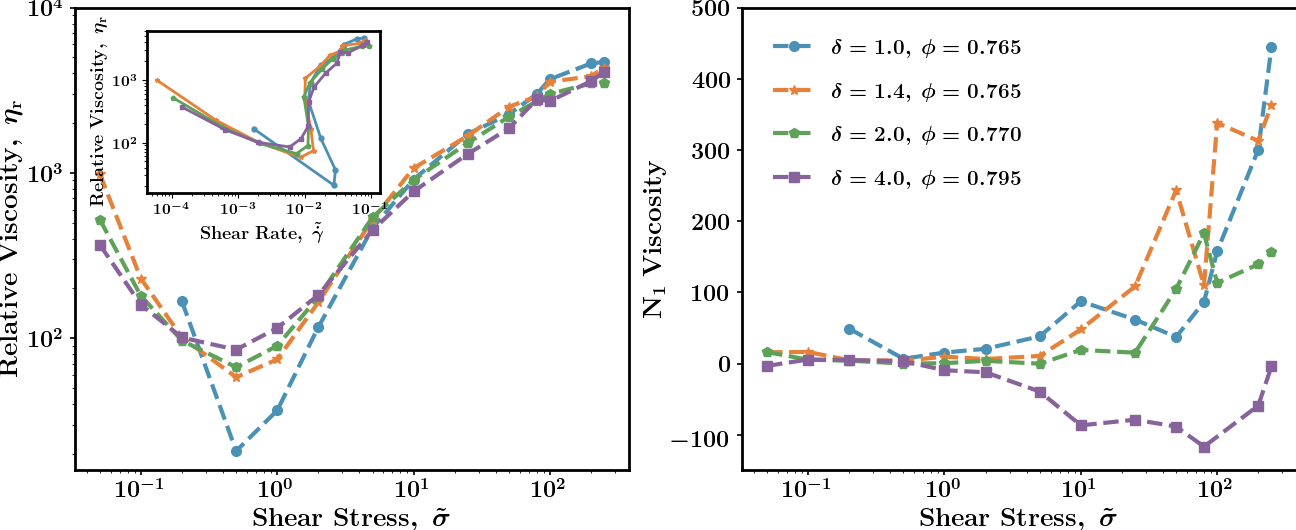

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# --- Parameters ---
npp      = 1000
vr       = '0.5'
phi_vals = [0.765, 0.765, 0.77, 0.795]
ar_vals  = [1.0, 1.4, 2.0, 4.0]
off      = 100
numRun   = 1

line_markers  = ['o', '*', 'p', 's']
colors        = ['#4a91b5', '#e68139', '#5da258', '#87629b']
stress        = ['0.05','0.1','0.2','0.5','1','2','5','10','25','50','80','100','200','250']
stress_floats = [float(s) for s in stress]

# --- Setup figure ---
fig, axs = plt.subplots(1, 2, figsize=(13.05, 5.39), constrained_layout=True)
ax_main, ax_n1 = axs

# inset_axes replacement (relative coords: [x0, y0, width, height])
ax_inset = ax_main.inset_axes([0.13, 0.60, 0.42, 0.35])  

# --- Loop over aspect ratios ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    visc, visc_std, sr, sr_std = [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress)

    for i, s in enumerate(stress):    
        path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                visc[i]     = np.mean(data[off:, 3])
                visc_std[i] = np.std(data[off:, 3])
                sr[i]       = np.mean(data[off:, 2])
                sr_std[i]   = np.std(data[off:, 2])
        except (IndexError, FileNotFoundError):
            continue

    # Filter NaNs
    mask = ~np.isnan(visc)
    stress_plot = np.array(stress_floats)[mask]
    visc_plot   = np.array(visc)[mask]
    sr_plot     = np.array(sr)[mask]

    # Plot viscosity vs stress (main plot)
    ax_main.plot(stress_plot, visc_plot, '--', marker=line_markers[j],
                 color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij}$',
                 markersize=7, linewidth=3)

    # Plot viscosity vs shear rate (inset)
    ax_inset.plot(sr_plot, visc_plot, '-', marker=line_markers[j],
                  color=colors[j], markersize=3.5, linewidth=2)

# --- Format sizes ---
labelsize = 19   # axis label size
ticksize  = 17   # tick label size
inset_labelsize = 13
inset_ticksize  = 11

# --- Format ax_main ---
ax_main.set(xscale='log', yscale='log')
ax_main.set_xlabel(r'$\mathbf{Shear\;Stress,\; \tilde{\sigma}}$', style='italic', fontweight='bold', fontsize=labelsize)
ax_main.set_ylabel(r'$\mathbf{Relative\;Viscosity,\; \eta_r}$', style='italic', fontsize=labelsize, fontweight='bold')
ax_main.set_xticks([0.1, 1, 10, 100])
ax_main.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_main.set_yticks([100, 1000, 10000])
ax_main.set_yticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=ticksize, fontweight='bold')
ax_main.tick_params(axis='both', which='major', labelsize=ticksize, width=1.2)

# --- Format inset ---
ax_inset.set(xscale='log', yscale='log')
#ax_inset.set_xlabel(r'$\mathbf{\dot \gamma/ \dot \gamma_{0}}$', fontsize=inset_labelsize, fontweight='bold', style='italic')
#ax_inset.set_ylabel(r'$\mathbf{\eta_r}$', fontsize=inset_labelsize, fontweight='bold', style='italic')
ax_inset.set_xlabel(r'$\mathbf{Shear\;Rate,\; \tilde{\dot{\gamma}}}$', fontsize=inset_labelsize, fontweight='bold')
ax_inset.set_ylabel(r'$\mathbf{Relative\;Viscosity,\; \eta_r}$', fontsize=inset_labelsize, fontweight='bold')
ax_inset.tick_params(axis='both', which='major', labelsize=inset_ticksize, width=0.8)

# --- Second subplot (N1 vs stress) ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    n1, n1_std = [np.nan]*len(stress), [np.nan]*len(stress)
    
    for i, s in enumerate(stress):
        if arj == 4 and s == '100':
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_2'
        else:
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                n1[i]     = np.mean(data[off:, 10])
                n1_std[i] = np.std(data[off:, 10])
        except (IndexError, FileNotFoundError):
            continue

    mask = ~np.isnan(n1)
    stress_plot = np.array(stress_floats)[mask]
    n1_plot     = np.array(n1)[mask]

    ax_n1.plot(stress_plot, n1_plot, '--', marker=line_markers[j],
               color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij:.3f}$',
               markersize=7, linewidth=3)
    
# --- Format ax_n1 ---
ax_n1.set(xscale='log')
ax_n1.set_ylim([-150, 500])
#ax_n1.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=labelsize, fontweight='bold', style='italic')
#ax_n1.set_ylabel(r'$\mathbf{N_{1}/\eta_{0}}$', fontsize=labelsize, fontweight='bold')
ax_n1.set_xlabel(r'$\mathbf{Shear\;Stress,\; \tilde{\sigma}}$', fontsize=labelsize, fontweight='bold', style='italic')
ax_n1.set_ylabel(r'$\mathbf{N_{1}\;Viscosity}$', fontsize=labelsize, fontweight='bold')


ax_n1.set_xticks([0.1, 1, 10, 100])
ax_n1.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_n1.tick_params(axis='both', which='major', labelsize=ticksize, width=1.2)

# --- Add legends ---
#ax_main.legend(loc='upper left', fontsize=9, labelspacing=1.1, borderpad=0.5, framealpha=0.5)
ax_n1.legend(loc='upper left', fontsize=15, labelspacing=1.2, borderpad=1, framealpha=0.5)

# --- Save and show ---
#plt.tight_layout()
ax_main.set_facecolor("none")
ax_inset.set_facecolor("none")
ax_n1.set_facecolor("none")
fig.patch.set_alpha(0.0)

for ax in [ax_main, ax_inset, ax_n1]:
    for spine in ax.spines.values():
        spine.set_linewidth(2.0)  
        
plt.savefig(f'{fig_save_path}/flowcurve_n1.png', bbox_inches="tight", dpi=600, transparent=True)
plt.show()

In [4]:
## Making 3x3 figure for poster
# This part reads the data next cell plots it

import os, glob
import numpy as np
import matplotlib.pyplot  as plt
from   matplotlib.patches import Ellipse

npp    = 1000
runs   = 1
phii   = [0.72, 0.74, 0.77]
vr     = '0.5'
ar     = 1.4
off    = 100
k      = 7  # max number of neighbors
wRange = 15  # range for angular velocity histogram

labelfont = 14


angvel_all_phi = []
neighAngVel_all_phi = []
colors_all_phi = []

for idx, phi in enumerate(phii):
    phir = f"{phi:.3f}" if len(str(phi).split('.')[1]) > 2 else f"{phi:.2f}"

    angvel_all, neighAngVel_all, colors_all = [], [], []

    for l in range(runs):
        dataname  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{ar}/Vr_{vr}/run_{l+1}"  
        dataFile  = open(glob.glob(f'{dataname}/data_*.dat')[0], 'r')
        parFile   = open(glob.glob(f'{dataname}/par_*.dat')[0], 'r')
        #rigFile   = open(glob.glob(f'{dataname}/rig_*.dat')[0], 'r')
        rigFile   = open(glob.glob(f'{dataname}/rigPrime.txt')[0], 'r')
        datdata   = np.genfromtxt(dataFile)
        pardata   = readFiles.readParFile(parFile)
        rigdata   = readFiles.rigList(rigFile)
        srate     = datdata[off:, 2]
        parLines  = open(glob.glob(f'{dataname}/par_*.dat')[0], 'r').readlines()
        lx = float(parLines[3].split()[2]) 
        lz = float(parLines[5].split()[2])

        for i, frame in enumerate(tqdm(pardata[off:], desc="particle file parse", leave=False)):
            angvel = frame[:, 8]
            pidx   = frame[:, 0]
            px     = frame[:, 2]
            pz     = frame[:, 3]
            sr     = srate[i]

            xmat, zmat = np.outer(px, np.ones(len(px))), np.outer(pz, np.ones(len(pz)))
            dxij, dzij = xmat.T - xmat, zmat.T - zmat

            # Lees-Edwards boundary
            dxij[dzij >  lz/2.] -= sr*lx
            dzij[dzij >  lz/2.] -= lz
            dxij[dzij < -lz/2.] += sr*lx
            dzij[dzij < -lz/2.] += lz

            # X periodic
            dxij[dxij >  lx/2.] -= lx
            dxij[dxij < -lx/2.] += lx

            dij = np.sqrt(dxij**2 + dzij**2)

            for ii in pidx.astype(int):
                sorted_indices = np.argsort(dij[:, ii])
                within_cutoff  = dij[sorted_indices, ii] <= 1.5 * (1+ar)
                idx_neighbors  = sorted_indices[within_cutoff][1:k+1]  # skip self
                neighAngVel_all.append(np.mean(angvel[idx_neighbors]) / sr)

            rigList = [set(sum(rigFrame, [])) for rigFrame in rigdata]
            color = np.array(['white'] * npp)
            color[list(rigList[off + i])] = 'r'

            angvel_all.extend(angvel / sr)
            colors_all.extend(list(color))

    angvel_all      = np.array(angvel_all) - np.mean(angvel_all)
    neighAngVel_all = np.array(neighAngVel_all) - np.mean(neighAngVel_all)
    colors_all      = np.array(colors_all)
    
    angvel_all_phi.append(angvel_all)
    neighAngVel_all_phi.append(neighAngVel_all)
    colors_all_phi.append(colors_all)

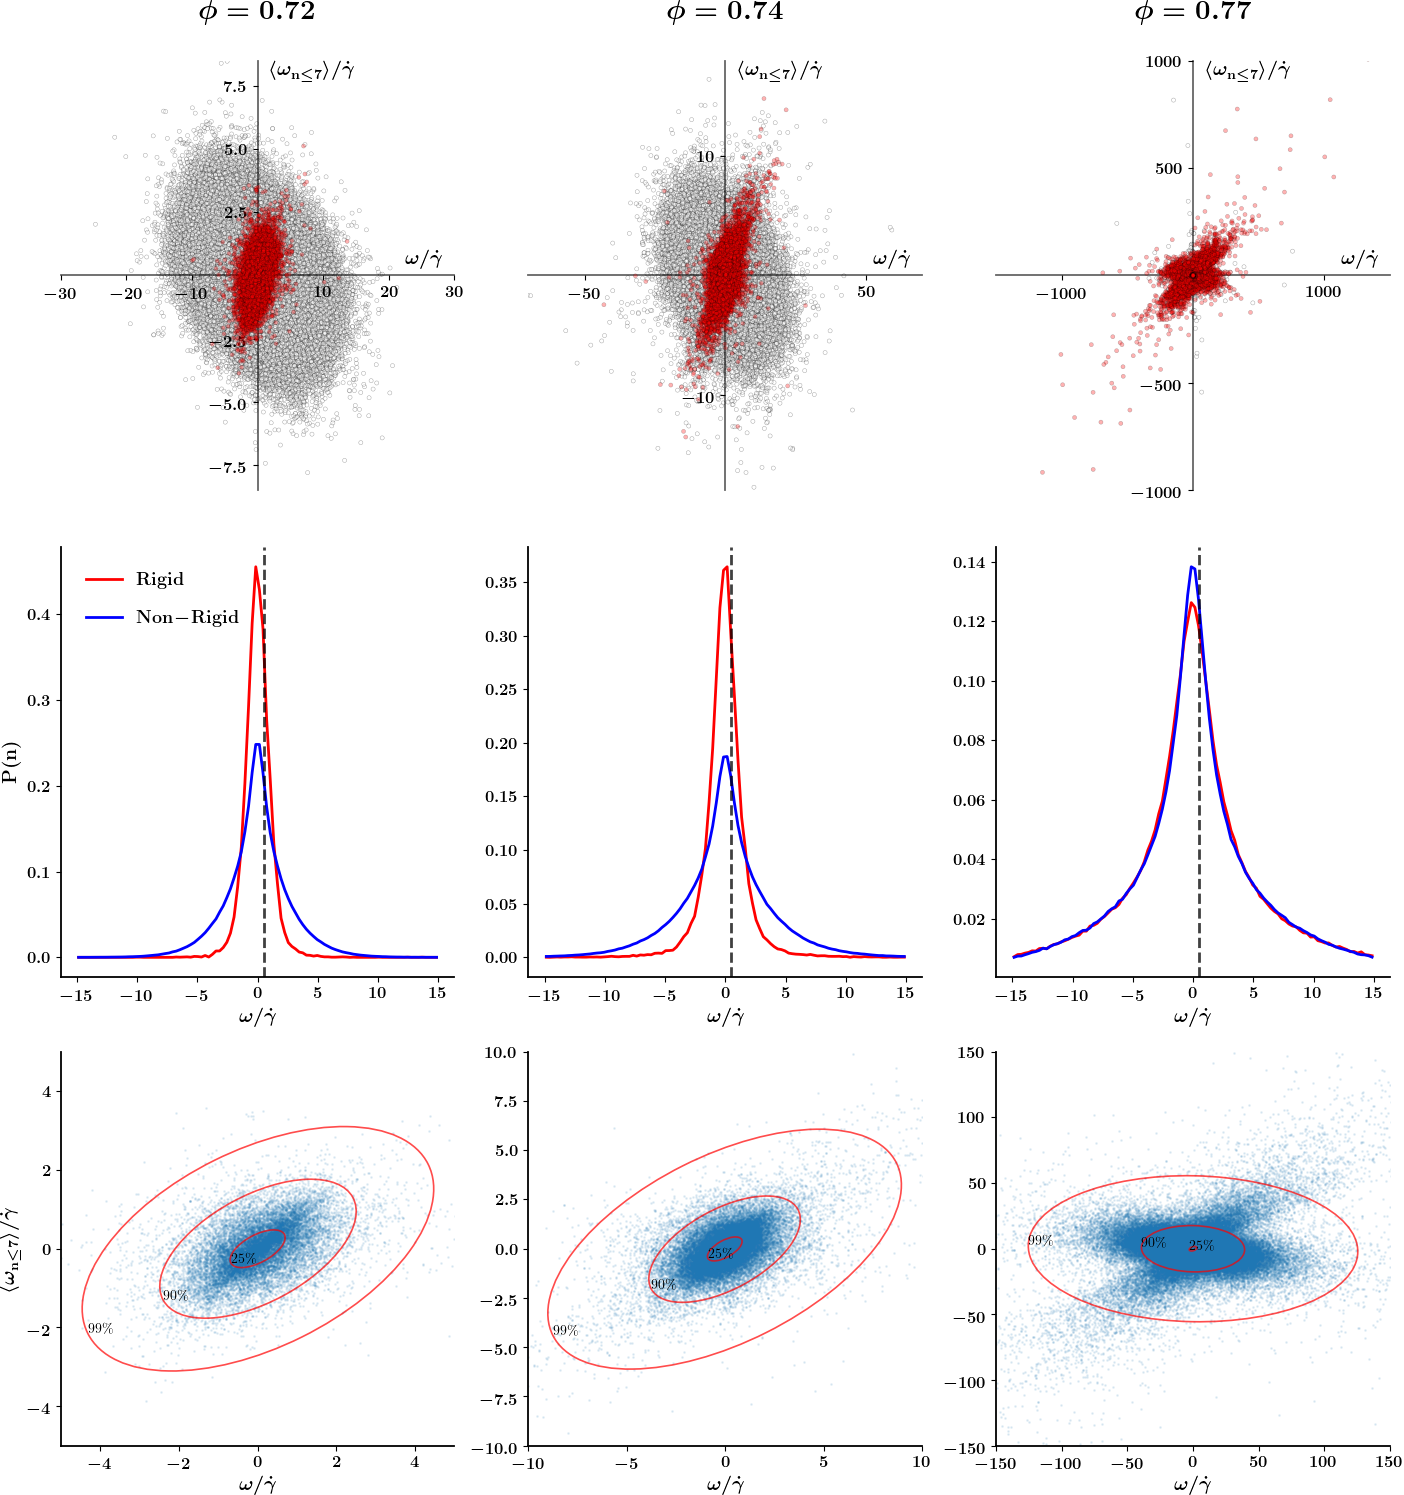

In [5]:
## Plotting
fig, ax = plt.subplots(3, 3, figsize=(14.28, 15.27)) 

tick_fontsize = 12  # font size for x and y ticks

for idx, phi in enumerate(phii):
    col = idx  # column index
    phir = f"{phi:.3f}" if len(str(phi).split('.')[1]) > 2 else f"{phi:.2f}"

    # --- Add column heading ---
    ax[0, col].set_title(fr'$\phi = {phir}$', fontsize=20, fontweight='bold', pad=30)

    # --- Column 1: Angular velocity vs neighbors ---
    is_red = colors_all_phi[col] == 'r'
    xaxis_lims = [30, 70, 1500]
    yaxis_lims = [[-8.5, 8.5], [-18, 18], [-1e3, 1e3]]
    
    ax[0, col].scatter(angvel_all_phi[col][~is_red], neighAngVel_all_phi[col][~is_red],
                       s=35, c=colors_all_phi[col][~is_red], alpha=0.4, marker='.',
                       linewidths=0.3, edgecolors='k', zorder=1)
    ax[0, col].scatter(angvel_all_phi[col][is_red], neighAngVel_all_phi[col][is_red],
                       s=35, c=colors_all_phi[col][is_red], alpha=0.3, marker='.',
                       linewidths=0.3, edgecolors='k', zorder=10)
    for spine in ['left', 'bottom']:
        ax[0, col].spines[spine].set_position('zero')
        ax[0, col].spines[spine].set_alpha(0.6)
        ax[0, col].spines[spine].set_linewidth(1.3) 
    for spine in ['top', 'right']:
        ax[0, col].spines[spine].set_color('none')
        
    ax[0, col].xaxis.set_ticks_position('bottom')
    ax[0, col].yaxis.set_ticks_position('left')
    ax[0, col].set_xticks([t for t in ax[0, col].get_xticks() if t != 0])
    ax[0, col].set_yticks([t for t in ax[0, col].get_yticks() if t != 0])
    ax[0, col].set_xlim(-xaxis_lims[col], xaxis_lims[col])
    ax[0, col].set_ylim(yaxis_lims[col][0], yaxis_lims[col][1])
    ax[0, col].set_xlabel(r'$\mathbf{\omega / \dot \gamma}$', labelpad=15, ha='right', fontsize=labelfont)
    ax[0, col].set_ylabel(fr'$\mathbf{{\langle \omega_{{n \leq {k}}} \rangle / \dot \gamma}}$', 
                          labelpad=10, rotation=0, fontsize=labelfont)
    ax[0, col].xaxis.set_label_coords(0.97, 0.56)
    ax[0, col].yaxis.set_label_coords(0.64, 0.95) 
    ax[0, col].grid(False)
    ax[0, col].tick_params(axis='x', labelsize=tick_fontsize)
    ax[0, col].tick_params(axis='y', labelsize=tick_fontsize)

    # --- Column 2: Angular velocity histogram ---
    angVelAllRig    = angvel_all_phi[col][is_red]
    angVelAllNonRig = angvel_all_phi[col][~is_red]

    hist, bins = np.histogram(angVelAllRig, bins=100, range=(-wRange, wRange), density=True)
    ax[1, col].plot(0.5*(bins[1:]+bins[:-1]), hist, color='red', label=r'$\mathbf{Rigid}$', linewidth=2)
    hist, bins = np.histogram(angVelAllNonRig, bins=100, range=(-wRange, wRange), density=True)
    ax[1, col].plot(0.5*(bins[1:]+bins[:-1]), hist, color='blue', 
                    label=r'$\mathbf{Non\!-\!Rigid}$', linewidth=2)
    ax[1, col].axvline(x=0.5, color='k', linestyle='--', alpha=0.75, linewidth=2)
    ax[1, col].set_xlabel(r'$\mathbf{\omega / \dot \gamma}$', fontsize=labelfont)
    ax[1, 0].set_ylabel(r'$\mathbf{P(n)}$', fontsize=labelfont)
    ax[1, col].spines['top'].set_color('none')
    ax[1, col].spines['right'].set_color('none')
    ax[1, col].spines['left'].set_linewidth(1.3)
    ax[1, col].spines['bottom'].set_linewidth(1.3)
    ax[1, 0].legend(fontsize=13, labelspacing=1.2, borderpad=0.9)
    ax[1, col].grid(False)
    ax[1, col].tick_params(axis='x', labelsize=tick_fontsize)
    ax[1, col].tick_params(axis='y', labelsize=tick_fontsize)

    # --- Column 3: Mahalanobis ellipse ---
    points = np.vstack((angvel_all_phi[col][is_red], neighAngVel_all_phi[col][is_red])).T
    if len(points) > 1:
        mu_all  = np.mean(points, axis=0)
        cov_all = np.cov(points, rowvar=False)
        inv_cov_all = np.linalg.inv(cov_all)
        mahal_sq = np.einsum('ij,jk,ik->i', points - mu_all, inv_cov_all, points - mu_all)

        percentiles = [25, 90,  99]
        axis_lims   = [5 , 10, 150]
        ax[2, col].scatter(points[:,0], points[:,1], s=1, alpha=0.1)

        for p in percentiles:
            thresh = np.percentile(mahal_sq, p)
            mask   = mahal_sq <= thresh
            selected = points[mask]
            if len(selected) < 5: 
                continue

            mu  = np.mean(selected, axis=0)
            cov = np.cov(selected, rowvar=False)
            eigenvals, eigenvecs = np.linalg.eigh(cov)
            order     = np.argsort(eigenvals)[::-1]
            eigenvals = eigenvals[order]
            eigenvecs = eigenvecs[:, order]

            angle     = np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
            delta_sel = selected - mu
            inv_cov   = np.linalg.inv(cov)
            max_mahal = np.sqrt(np.max(np.einsum('ij,jk,ik->i', delta_sel, inv_cov, delta_sel)))
            width, height = 2 * max_mahal * np.sqrt(eigenvals)

            ell = Ellipse(xy=mu, width=width, height=height, angle=angle, edgecolor='red', 
                          facecolor='none', lw=1.2, alpha=0.7)
            ax[2, col].add_patch(ell)

            dx, dy = eigenvecs[:,0] * np.sqrt(eigenvals[0]) * max_mahal
            ax[2, col].text(mu[0]+dx, mu[1]+dy, fr"{p}\%", fontsize=10, weight='bold')

    ax[2, col].set_xlim([-axis_lims[col], axis_lims[col]])
    ax[2, col].set_ylim([-axis_lims[col], axis_lims[col]])
    ax[2, col].set_aspect('equal')
    ax[2, col].set_xlabel(r'$\mathbf{\omega / \dot \gamma}$', fontsize=labelfont)
    ax[2, 0].set_ylabel(fr'$\mathbf{{\langle \omega_{{n \leq {k}}} \rangle / \dot \gamma}}$', 
                          fontsize=labelfont)
    ax[2, col].spines['top'].set_color('none')
    ax[2, col].spines['right'].set_color('none')
    ax[2, col].spines['left'].set_linewidth(1.3)
    ax[2, col].spines['bottom'].set_linewidth(1.3)
    ax[2, col].grid(False)
    ax[2, col].tick_params(axis='x', labelsize=tick_fontsize)
    ax[2, col].tick_params(axis='y', labelsize=tick_fontsize)

plt.tight_layout()
plt.savefig(f'{fig_save_path}/angular_vel_plots_prime.png', bbox_inches="tight", dpi=250, transparent=False)
plt.show()

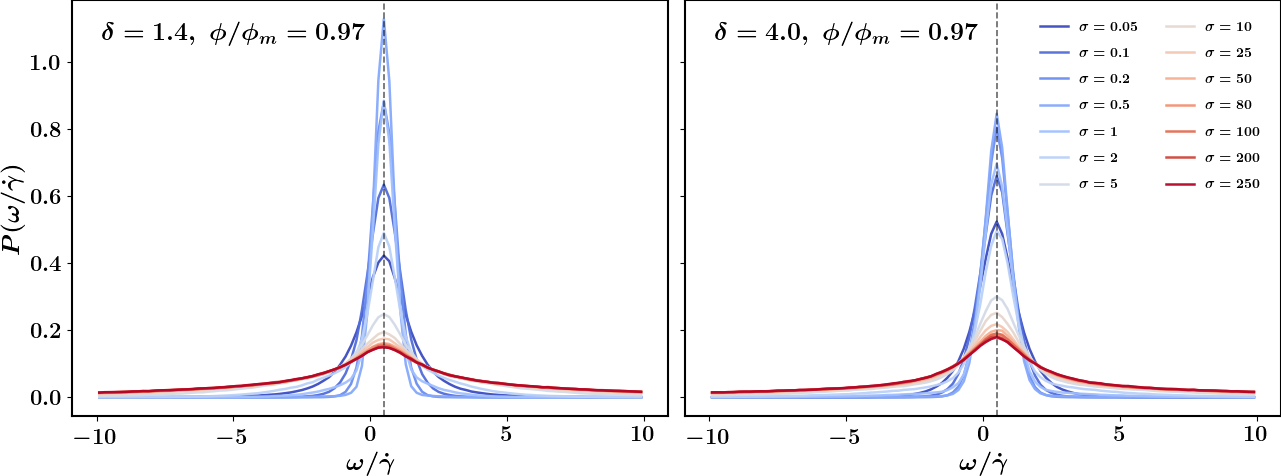

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import readFiles  # assuming this is your custom module

# Parameters
npp = 1000
stress = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress_vals = [float(s) for s in stress]
vr = '0.5'

phi = [0.765, 0.795]
ar  = [1.4, 4.0]  # Different aspect ratios

numRun = 1
off = 50

# Paths
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves/'
particleFile  = 'par_*.dat'
dataFile      = 'data_*.dat'
cmap = plt.get_cmap("coolwarm")

# Create figure
fig, ax = plt.subplots(1, 2, figsize=(13.05, 5), sharey=True)
plt.subplots_adjust(wspace=0.1)

for j, (arj, phij) in enumerate(zip(ar, phi)):
    angVelAll1 = []
    for s, stress_val in enumerate(stress):
        dataname = f'{topDir}stress_{stress[s]}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(dataname):
            try:
                par_file = glob.glob(f'{dataname}/{particleFile}')[0]
                dat_file = glob.glob(f'{dataname}/{dataFile}')[0]
                if par_file:
                    data    = np.loadtxt(dat_file)
                    parList = readFiles.readParFile(open(par_file))
                    srate   = data[:, 2]
                    
                    angVelAll1 = []
                    for frame in range(off, len(parList)):
                        frameList = parList[frame]
                        angVely = frameList[:, 8] / srate[frame]  # normalized
                        angVelAll1.extend(angVely)
                    
                    if angVelAll1:
                        angVelAll = np.array(angVelAll1)
                        hist, bins = np.histogram(angVelAll, bins=100, range=(-10, 10), density=True)
                        bin_centers = 0.5 * (bins[:-1] + bins[1:])
                        ax[j].plot(bin_centers, hist, label=fr'$\mathbf{{\sigma}} = {stress[s]}$', 
                                   color=cmap(s / (len(stress) - 1)), linewidth= 1.8, alpha=0.95)
                        
            except (IndexError, FileNotFoundError) as e:
                print(f"Error processing {dataname}: {e}")
                continue
    
    # Subplot formatting
    ax[j].axvline(x=0.5, color='k', linestyle='--', linewidth=1.2, alpha=0.6)
    ax[j].set_xlabel(r'$\mathbf{\omega/\dot{\gamma}}$', fontsize=18)
    #ax[j].set_title(fr'$\delta = {arj}, \;\phi/\phi_m = 0.97$', fontsize=19, pad=15)
    ax[j].text(0.05, 0.95, fr'$\delta = {arj}, \;\phi/\phi_m = 0.97$', 
               transform=ax[j].transAxes, fontsize=18, va='top', ha='left')
    ax[j].tick_params(axis='both', which='major', labelsize=16)
    
ax[0].set_ylabel(r'$P(\omega/\dot{\gamma})$', fontsize=18)

# Legend
ax[1].legend(fontsize=10, loc='upper right', labelspacing=1, borderpad=1, frameon=False, ncol=2)

for axis in ax:
    for spine in axis.spines.values():
        spine.set_linewidth(1.5)
        
plt.tight_layout()
plt.savefig(f'{fig_save_path}/angular_vel_stress_.png', bbox_inches="tight", dpi=250, transparent=True)
plt.show()

In [142]:
fig_save_path

PosixPath('/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/SOR_2025/figures')